# PREDICTION OF DIAMONDS PRICES

* **Descrição das colunas dos Datasets**

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.linear_model import LinearRegression

## Leitura dos Datasets

In [2]:
# Dataset histórico

histórico=pd.read_csv("./data/Histoical Dataset.csv")

histórico

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [3]:
# realizando backup
histórico_bkp=histórico.copy()

In [4]:
# Dataset do Rick

rick_diamonds=pd.read_csv("./data/Rick's diamonds.csv")

rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71


In [5]:
# realizando backup
rick_diamonds_bkp=rick_diamonds.copy()

## Baseline

In [6]:
# analisando estatísticas dos dados históricos
histórico.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# verificando valores nulos
histórico.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# criando a baseline com a média dos preços

baseline=rick_diamonds_bkp

baseline["price_predicted"]=histórico["price"].mean()

baseline

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.409644
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.409644
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3934.409644
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3934.409644
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3934.409644
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3934.409644
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,3934.409644
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3934.409644
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,3934.409644


In [9]:
# exportando baseline para arquivo .csv para verificar o RMSE
baseline.to_csv("./Preços_previstos/baseline.csv",index=False)

> **RMSE**=3980.713882502374

## Exploratory Data Analysis (EDA)

In [10]:
# verificando tipo de dados das colunas
histórico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


### Convertendo as variáveis categóricas em numéricas

#### Dataset histórico

* **Cut**

In [11]:
# verificando valores únicos
histórico["cut"].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [12]:
# criando uma coluna para os valores numéricos

cut_num={"Fair": "1", "Good": "2", "Very Good": "3", "Premium": "4", "Ideal": "5"}

histórico["cut_num"]=histórico["cut"].apply(lambda x: int(x.replace(x, cut_num[x])))

histórico

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3


* **Color**

In [13]:
# verificando valores únicos
histórico["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [14]:
# criando uma lista com os valores categóricos ordenados

color_cat=list(histórico["color"].unique())

color_cat.sort(reverse=True)

color_cat

['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [15]:
# criando um dicionário com as variáveis categóricas e seus respectivos números

color_cat_num={letter: str(index+1) for index, letter in enumerate(color_cat)}

color_cat_num

{'J': '1', 'I': '2', 'H': '3', 'G': '4', 'F': '5', 'E': '6', 'D': '7'}

In [16]:
# criando uma coluna para os valores numéricos

histórico["color_num"]=histórico["color"].apply(lambda x: int(x.replace(x, color_cat_num[x])))

histórico

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7


* **Clarity**

In [17]:
# verificando valores únicos
histórico["clarity"].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [18]:
# criando uma coluna para os valores numéricos

clarity_cat={"I1": "1", "SI2": "2", "SI1": "3", "VS2": "4", "VS1": "5", "VVS2": "6", "VVS1": "7", "IF": "8"}

histórico["clarity_num"]=histórico["clarity"].apply(lambda x: int(x.replace(x, clarity_cat[x])))

histórico

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3


#### Dataset do Rick

* **Cut**

In [19]:
# criando uma coluna para os valores numéricos

rick_diamonds["cut_num"]=rick_diamonds["cut"].apply(lambda x: int(x.replace(x, cut_num[x])))

rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_num
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5


* **Color**

In [20]:
# criando uma coluna para os valores numéricos

rick_diamonds["color_num"]=rick_diamonds["color"].apply(lambda x: int(x.replace(x, color_cat_num[x])))

rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5


* **Clarity**

In [21]:
# criando uma coluna para os valores numéricos

rick_diamonds["clarity_num"]=rick_diamonds["clarity"].apply(lambda x: int(x.replace(x, clarity_cat[x])))

rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num,clarity_num
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,6
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,7


### Verificando valores

#### Dataset histórico

In [22]:
# analisando estatísticas dos dados
histórico.describe()

,carat,depth,table,price,x,y,z,cut_num,color_num,clarity_num
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.906416,4.407254,4.055456
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.116568,1.699858,1.645542
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,8.000000


Observa-se que há valores zerados nas colunas x, y e z, o que é impossível.

In [23]:
# verificando linhas que contém valor zerado em alguma dessas colunas (x, y ou z)
histórico[(histórico["x"]==0) | (histórico["y"]==0) | (histórico["z"]==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,4,4,2
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,4,3,1
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,4,4,2
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,4,5,2
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,2,4,1
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,5,5,2
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,3,4
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,4,4
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,1,4,5
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,4,3,2


Para as linhas que contém valores depth, x e y, é possível estimar o valor de z conforme a fórmula:
>Total depth percentage = z / mean(x, y) = 2 * z / (x + y)

Os outros valores serão dropados do Dataframe histórico.

In [24]:
# dropando linhas com x e/ou y zerados dentre os dados acima

histórico=histórico[~((histórico["x"]==0) | (histórico["y"]==0) & (histórico["z"]==0))].reset_index(drop=True)


histórico

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48928,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3
48929,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3
48930,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3
48931,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3


* **Estimando o valor de z**

In [25]:
# verificando linhas que contém valor zerado em x ou y
histórico[(histórico["x"]==0) | (histórico["y"]==0) | (histórico["z"]==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,4,4,2
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,4,3,1
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,4,4,2
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,4,5,2
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,2,4,1
12288,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,4,4
22123,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,4,3,2
23687,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0,4,2,3
24568,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0,4,3,3
24928,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0,4,3,4


In [26]:
# estimando valor de z

histórico["z_calculado"]=[histórico.iloc[index, 4]*np.mean([histórico.iloc[index, 7], histórico.iloc[index, 8]])/100
                         if histórico.iloc[index, 9]==0 else histórico.iloc[index, 9] for index in histórico.index]

histórico

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calculado
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48928,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3,3.58
48929,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3,3.50
48930,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3,3.61
48931,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3,3.56


## Regressão Linear

### Primeiro modelo

* **Usando todas as colunas**

In [27]:
# criando o modelo

model=LinearRegression()

X=histórico[["carat", "cut_num", "color_num", "clarity_num", "depth", "table", "x", "y", "z_calculado"]]
y=histórico["price"]

In [28]:
# treinando o modelo
model.fit(X,y)

LinearRegression()

In [29]:
# testando o modelo
rick_previsão=model.predict(rick_diamonds[["carat", "cut_num", "color_num", "clarity_num", "depth", "table", "x", "y", "z"]])

In [30]:
# criando Dataset do primeiro modelo

rick_predict1=rick_diamonds

rick_predict1["price_predicted"]=rick_previsão

rick_predict1

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num,clarity_num,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,3097.248883
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,316.794945
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,1081.119307
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,6924.419980
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,16624.713455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2,-490.688152
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,6,2704.673199
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,5246.709006
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,7,1695.059302


In [31]:
# verificando o score
model.score(X, y)

0.9080733505779773

In [32]:
# exportando modelo para arquivo .csv para verificar o RMSE
rick_predict1.to_csv("./Preços_previstos/modelo1.csv", index=False)

>**RMSE**=1287.6253018160428

>**R²**=90.81%

### Segundo modelo

* **Transformando o Dataset usando logaritmo**

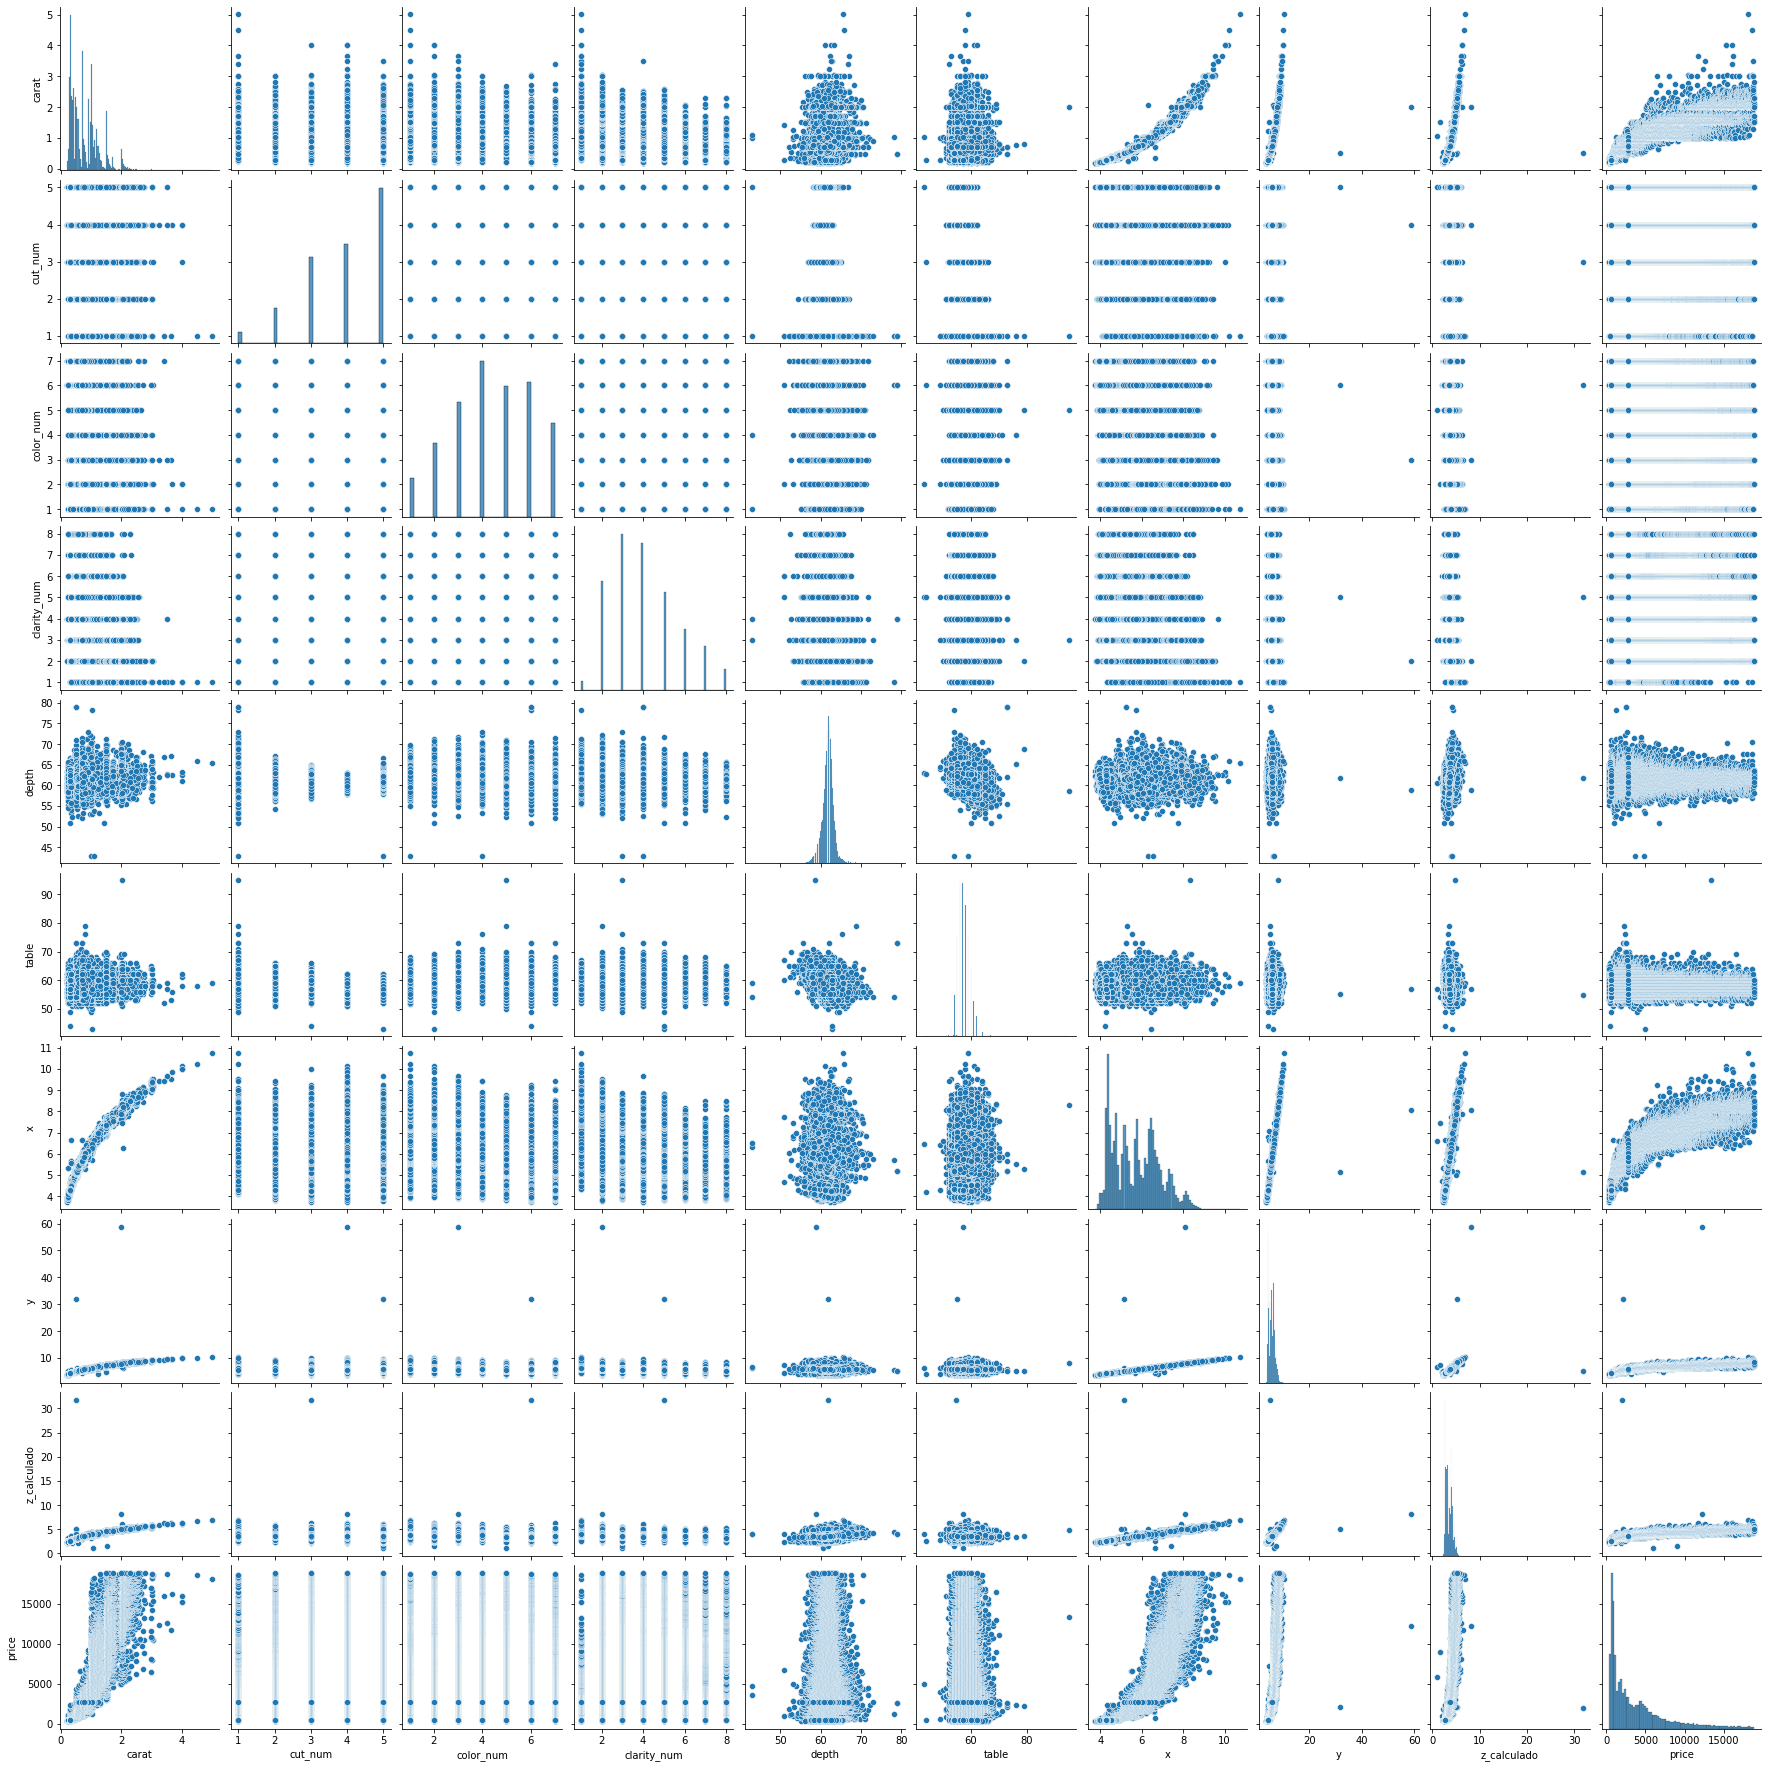

In [33]:
# verificando os gráficos de coluna x coluna
sns.pairplot(histórico[["carat", "cut_num", "color_num", "clarity_num", "depth", "table", "x", "y", "z_calculado", "price"]])

Observa-se que a correlação entre preço e as variáveis x, y e z **não é linear**, e possui uma tendência **logarítmica**.

In [34]:
# analisando estatísticas do Dataset do Rick
rick_diamonds.describe()

,carat,depth,table,x,y,z,cut_num,color_num,clarity_num,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,3.881400,4.39160,4.007600,3913.872936
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,1.116774,1.71337,1.662196,3803.391986
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,-2028.221685
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,3.000000,3.00000,3.000000,1089.068216
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,4.000000,4.00000,4.000000,2866.924119
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5.000000,6.00000,5.000000,5719.573416
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,5.000000,7.00000,8.000000,33756.658355


Observa-se que há valores zerados nas colunas x, y e z. Portanto, não será possível aplicar o ln nessas variáveis.

In [35]:
# criando o modelo

model=LinearRegression()

X=histórico[["carat", "cut_num", "color_num", "clarity_num", "depth", "table"]]
y=histórico["price"]

In [36]:
# Convertendo para logaritmo
X_ln=np.log(X)
y_ln=np.log(y)

In [37]:
# treinando o modelo
model.fit(X_ln, y_ln)

LinearRegression()

In [38]:
# testando o modelo

rick=rick_diamonds[["carat", "cut_num", "color_num", "clarity_num", "depth", "table"]]

rick_ln=np.log(rick)

rick_previsão_ln=model.predict(rick_ln)

In [39]:
# Convert de volta (expnencial)
rick_predicted=np.exp(rick_previsão_ln)

In [40]:
# criando Dataset do segundo modelo
rick_predict2=rick_diamonds
rick_predict2["price_predicted"]=rick_predicted
rick_predict2

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num,clarity_num,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,2850.345298
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,854.339547
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,1457.704665
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,7206.398695
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,18298.028657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2,446.493949
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,6,1965.997558
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,4868.354813
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,7,828.863978


In [41]:
# verificando o score
model.score(X_ln, y_ln)

0.9821117537388616

In [42]:
# exportando modelo para arquivo .csv para verificar o RMSE
rick_predict2.to_csv("./Preços_previstos/modelo2.csv", index=False)

>**RMSE**=890.9525826770072

>**R²**=98.21%

#### Dataset com os preços previstos

In [43]:
rick_predict2

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num,clarity_num,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,2850.345298
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,854.339547
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,1457.704665
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,7206.398695
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,18298.028657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2,446.493949
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,6,1965.997558
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,4868.354813
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,7,828.863978
